# Notebook para demonstrar um exemplo de regressao linear

Este notebook apresenta um modelo simples de regressão 
linear utilizando dados de preço de moradia em boston.
É utilizado um dataset púlico ...


In [24]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [25]:
boston = load_boston()

In [26]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [27]:
import  pandas as pd

df_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
df_boston['target'] = pd.Series(boston.target)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [28]:
# Separar o modelo em treinamento e teste
train_data, test_data, train_target, test_target = train_test_split(boston.data, boston.target, train_size=0.8) 

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


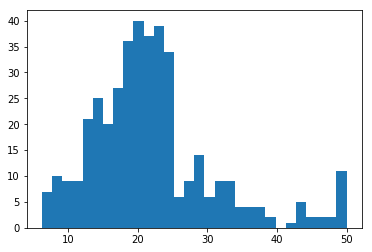

In [29]:
# Visualizar os dados

import matplotlib.pyplot as plt

%matplotlib inline

plt.hist(train_target, bins=30)
plt.show()

Text(0,0.5,'Preco')

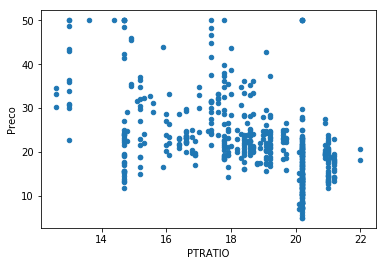

In [30]:
ax = df_boston.plot.scatter(x='PTRATIO', y='target')
ax.set_xlabel('PTRATIO')
ax.set_ylabel('Preco')

## Using linear regression to predict data


Let $x$ be our input and $y$ be our output.

### Linear Regression: Simple 1-D version

Our linear  regression model should be\:

\\(y = \beta x + c + \epsilon \\)

where:

* \\(\beta\\) is a constant
* $c$ is a constan
* $\epsilon$ represents the noise

### Multidimensional linear regression

\\(y = f(x_1, x_2, ..., x_n)\\) y is a function of multiple inputs variables.

So, our model should be:

\\(y = \sum_{i}^{n}{\beta_i}{x_i} + c + \epsilon\\) 

In [31]:
from sklearn import linear_model
linreg = linear_model.LinearRegression()

In [32]:
room_index = 5
linreg.fit(train_data[:, room_index: room_index + 1], train_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
linreg.predict([[4], [9], [10], [11], [12], [200]])

array([  1.68135919e+00,   4.66433071e+01,   5.56356967e+01,
         6.46280863e+01,   7.36204759e+01,   1.76418972e+03])

Text(0,0.5,'Preco')

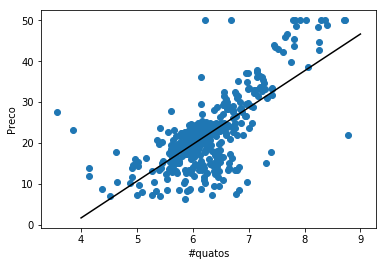

In [34]:
fig, ax = plt.subplots()
ax.scatter(train_data[:, room_index], train_target)
ax.plot([[4], [9]], linreg.predict([[4], [9]]), 'k-')
ax.set_xlabel('#quatos')
ax.set_ylabel('Preco')

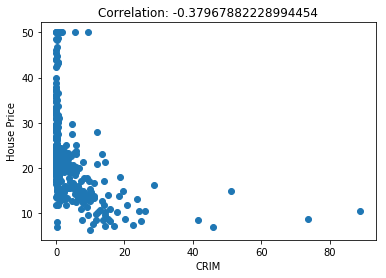

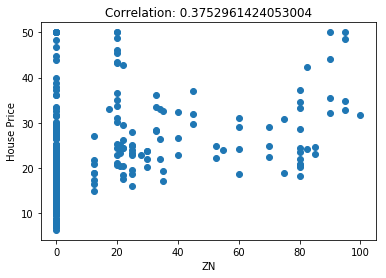

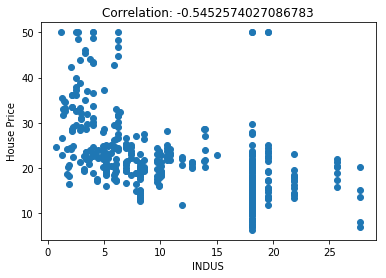

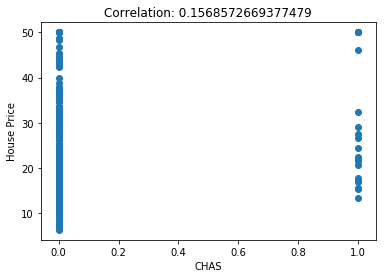

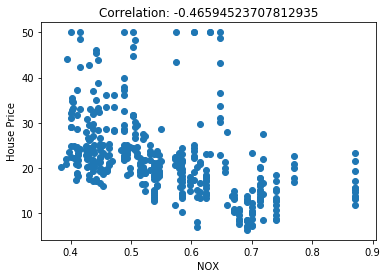

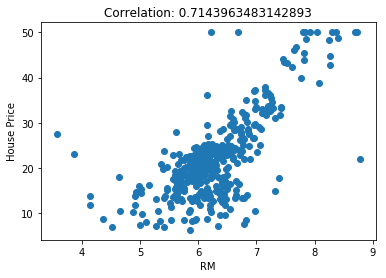

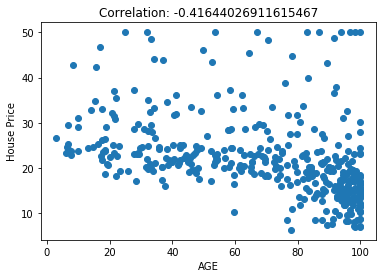

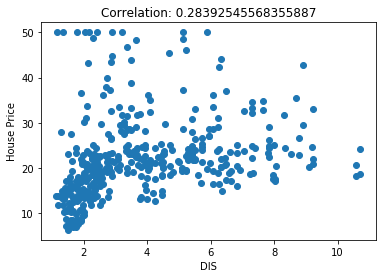

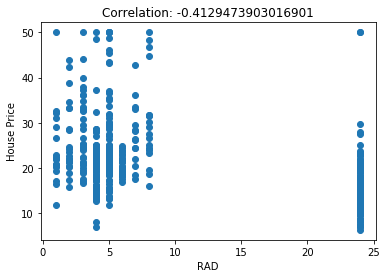

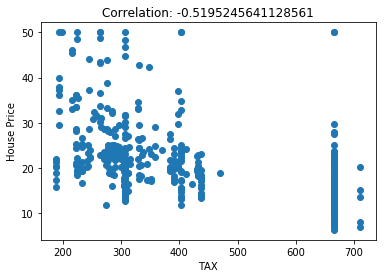

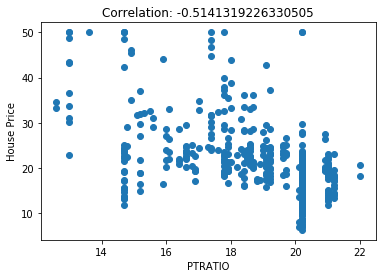

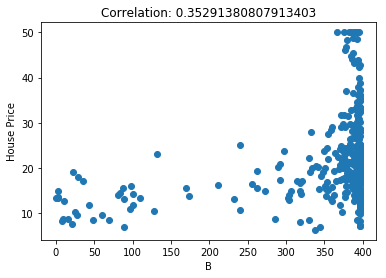

In [35]:
# Plot Scatter plot for all graphs

from scipy import stats

def plot_scatter(index):
    fig, ax = plt.subplots()
    x, y = train_data[:, index], train_target
    ax.scatter(x, y)
    ax.set_xlabel(boston.feature_names[index])
    ax.set_ylabel("House Price")
    ax.set_title("Correlation: {}".format(stats.pearsonr(x, y)[0]))
    
for i in range(0, train_data.shape[1] - 1):
    plot_scatter(i)

In [36]:
# Multidimensional data

linreg.fit(train_data, train_target)
prediction = linreg.predict(test_data)

Text(0,0.5,'Preco Medido')

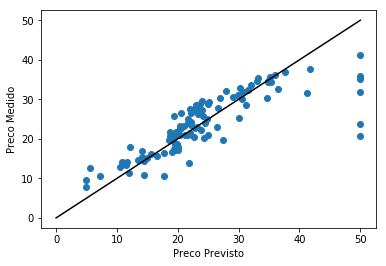

In [37]:
fig, ax = plt.subplots()
ax.scatter(test_target, linreg.predict(test_data))
ax.plot([0, 50], [0, 50], 'k-')
ax.set_xlabel('Preco Previsto')
ax.set_ylabel('Preco Medido')

In [38]:
test_target, linreg.predict(test_data)

(array([ 33.1,  36. ,  19.5,  22.8,  20.6,  34.9,  14.4,   5. ,  22.9,
         22.7,  50. ,  24.4,  17.8,  50. ,  14.1,  19.2,  21.9,  20. ,
         24.1,  37.6,  20.4,  10.5,  34.7,  18.8,  23.3,  26.4,  20.3,
         22.2,  20.6,  17.8,  34.9,  18.7,  14.1,  41.3,  25. ,  12. ,
         31.2,   7.2,  21.7,  19.8,  23.6,  50. ,  21.7,  23.2,  24.8,
         19.5,  24. ,  22. ,  23. ,  20.4,  50. ,  36.4,  21. ,  18.6,
         12.1,  35.2,  29.9,  15.6,  35.4,  19.6,  25. ,  19.4,   5.6,
         30.3,  11.7,  16.6,  32. ,  27. ,  19.7,  31.5,  14.5,  22. ,
         24.3,  10.9,  30.7,  27.5,  13.5,  19.3,  30.1,  23.3,  21.2,
         22.2,  29.1,  22.1,  11.5,  27.9,  25.1,  19.1,  50. ,  23.8,
         20.1,  14.9,  21.6,  23.9,  33.2,  50. ,  23.1,  41.7,  19.3,
          5. ,  30.5,  26.6]),
 array([ 34.55056433,  36.06235116,  18.78514324,  27.83613774,
         22.72790245,  34.61047253,  10.79785965,   7.88947366,
         22.81476275,  20.39369277,  31.85713485,  23.958464

In [39]:
len(test_target)

102

In [42]:
# Calculate mean squared error RMSE

temp_sum = 0
for m, p in zip(test_target, linreg.predict(test_data)):
    difference = (m - p)**2
    temp_sum += difference

rmse = np.sqrt(temp_sum)/len(test_target)

print("RMSE = {}".format(rmse))

RMSE = 0.5772607999200488


In [43]:
rmse_percentual = rmse / np.mean(boston.target)
print("RMSE Percentual {}".format(rmse_percentual))

RMSE Percentual 0.0256186820059943
